In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
(X_train ,y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
X_train_sc = X_train/255.0
X_test_sc = X_test/255.0

In [8]:
def show_img(ind):
    plt.imshow(X_train[ind])
    return plt.show()

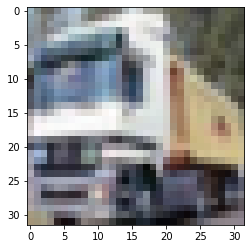

In [9]:
show_img(1)

In [21]:
def build_model():
    model = Sequential([
                        Flatten(input_shape = (32,32,3)),
                        Dense(32, activation = 'relu'),
                        Dense(16, activation = 'relu'),
                        Dense(8, activation = 'relu'),
                        Dense(10, activation ='sigmoid')
    ])

    model.compile(
        optimizer = Adam(learning_rate = 0.01),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [22]:
model = build_model()

In [23]:
model.fit(X_train_sc, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2491 - accuracy: 0.1277 - val_loss: 2.0840 - val_accuracy: 0.1863
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0735 - accuracy: 0.1828 - val_loss: 2.0560 - val_accuracy: 0.1890
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0570 - accuracy: 0.1868 - val_loss: 2.0585 - val_accuracy: 0.1812
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0508 - accuracy: 0.1907 - val_loss: 2.0477 - val_accuracy: 0.1875
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0483 - accuracy: 0.1890 - val_loss: 2.0444 - val_accuracy: 0.1868
Epoch 6/10
1250/1250 [==============================] - 4s 4ms/step - loss: 2.0482 - accuracy: 0.1902 - val_loss: 2.0474 - val_accuracy: 0.1893
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 2.0436 - accuracy: 0.1891 - val_loss: 2.0489 - val_accuracy:

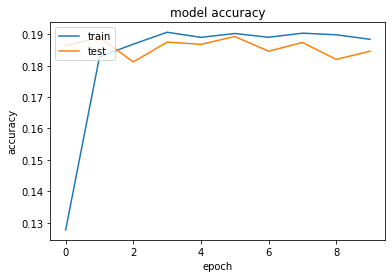

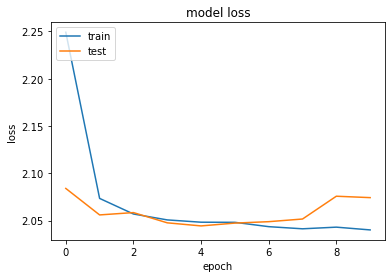

In [24]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()